In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# house_raw = pd.read_csv("../data/raw/raw_data.csv")
# house_raw.columns
house = pd.read_csv("../data/raw/raw_2.csv")
# house.isna().sum()
data = house.copy()

data= data.drop(columns = ["Date","waterfront present","Lattitude","Longitude"])
# pd.set_option('display.float_format', '{:.0f}'.format)
# post_pr = data.groupby(data["Postal Code"])["Price"].mean().reset_index()
# post_pr.rename(columns = {"Price":"Average Price"},inplace = True)
# post_pr
# pin = pd.read_csv("../data/raw/post.csv")


# pin[(pin["PINCODE"]>=122003) *(pin["PINCODE"]<=122072)]["POSTALDIVISION"]

# pin['PINCODE'] = pin['PINCODE'].astype(int)

# pin['PINCODE'] = pd.to_numeric(pin['PINCODE'], errors='coerce')  # invalid strings -> NaN
# pin[(pin["PINCODE"]>=122003) & (pin["PINCODE"]<=122072)][["PINCODE","OFFICE NAME"]]
# # pin.sample(25)
# condition of the house,bedroom,washroom,living lot no of school,
# house.loc[:,["grade of the house","condition of the house"]]
# house
# data.isna().drop(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   number of bedrooms                     14619 non-null  int64  
 2   number of bathrooms                    14619 non-null  float64
 3   living area                            14619 non-null  int64  
 4   lot area                               14619 non-null  int64  
 5   number of floors                       14619 non-null  float64
 6   number of views                        14619 non-null  int64  
 7   condition of the house                 14619 non-null  int64  
 8   grade of the house                     14619 non-null  int64  
 9   Area of the house(excluding basement)  14619 non-null  int64  
 10  Area of the basement                   14619 non-null  int64  
 11  Bu

average income comes upto 1.25 lakh and expenses upto 1L lets consider 25 k income for house 


In [14]:
data["p_inc"] = data["Price"].div(300000).round(2)
data["p_sqft"] = data["Price"].div(data["living area"]).round(2)
# data.loc[data["p_inc"]<1.5]["Price"]
#threshhold fpr this is 1.5 more than is not affordable
# data.loc[:,"number of bedrooms"].sort_values(ascending = False).value_counts()
# data.sample(10)

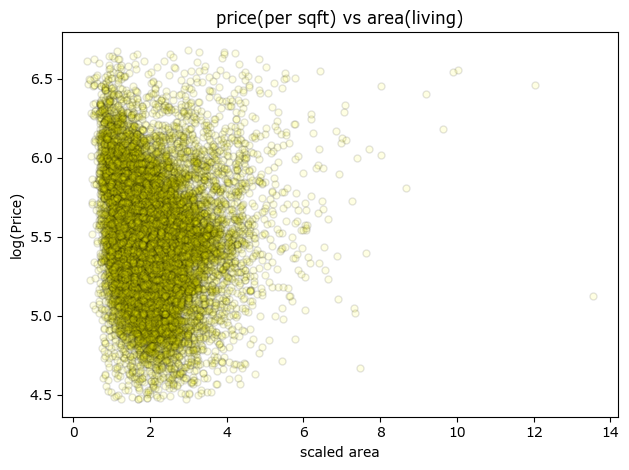

In [184]:
plt.figure()
plt.scatter(data["living area"]/1000,np.log(data["p_sqft"]),alpha = 0.11,s= 25,edgecolors = "black",color = "yellow")
plt.xlabel("scaled area")
plt.ylabel("log(Price)")
plt.title("price(per sqft) vs area(living)")
plt.tight_layout()
plt.savefig("price_area(Total).png")

# 
# Create 5 bins for Area
# data['Area_bin'] = pd.cut(data['living area'], bins=5)

# # Median price in each bin
# median_price_log = data.groupby('Area_bin',observed = True)['Price'].median().apply(np.log)

# # Plot clean bar chart
# median_price_log.plot(kind='bar')
# plt.xlabel('Area bins (sqft)')
# plt.ylabel('Log(Median Price)')
# plt.title('Median Price vs Area')
# plt.show()



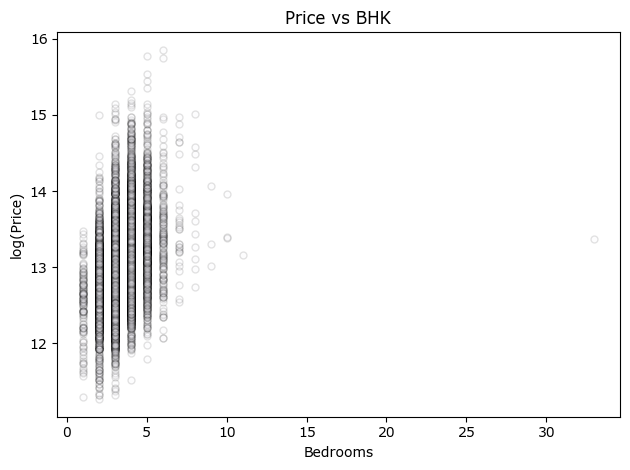

In [185]:
plt.scatter(data["number of bedrooms"],np.log(data["Price"]),alpha = 0.11,s= 25,edgecolors = "black",color = "#F5F3FA")
plt.xlabel("Bedrooms")
plt.ylabel("log(Price)")
plt.title("Price vs BHK")
plt.tight_layout()

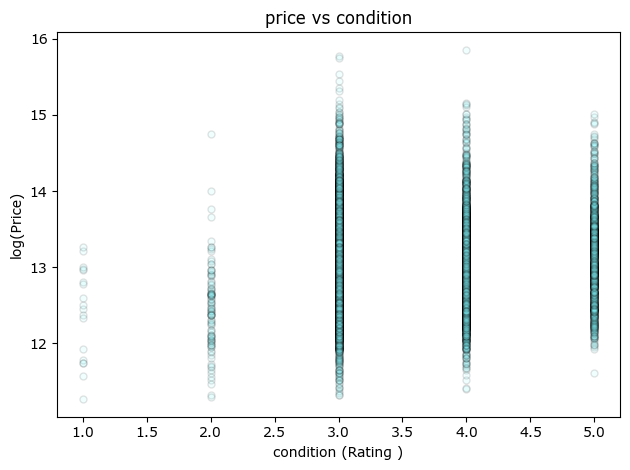

In [186]:
plt.scatter(data["condition of the house"],np.log(data["Price"]),alpha = 0.11,s= 25,edgecolors = "black",color = "#86F7FC")
plt.xlabel("condition (Rating )")
plt.ylabel("log(Price)")
plt.title("price vs condition")
plt.tight_layout()

In [187]:
# data.groupby()
data


,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,p_inc,p_sqft
0,6762810635,4,2.50,2920,4000,1.5,0,5,8,1910,...,1909,0,122004,2470,4000,2,51,1400000,4.67,479.45
1,6762810998,5,2.75,2910,9480,1.5,0,3,8,2910,...,1939,0,122004,2940,6600,1,53,1200000,4.00,412.37
2,6762812605,4,2.50,3310,42998,2.0,0,3,9,3310,...,2001,0,122005,3350,42847,3,76,838000,2.79,253.17
3,6762812919,3,2.00,2710,4500,1.5,0,4,8,1880,...,1929,0,122006,2060,4500,1,51,805000,2.68,297.05
4,6762813105,3,2.50,2600,4750,1.0,0,4,9,1700,...,1951,0,122007,2380,4750,1,67,790000,2.63,303.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,2,1.50,1556,20000,1.0,0,4,7,1556,...,1957,0,122066,2250,17286,3,76,221700,0.74,142.48
14615,6762830339,3,2.00,1680,7000,1.5,0,4,7,1680,...,1968,0,122072,1540,7480,3,59,219200,0.73,130.48
14616,6762830618,2,1.00,1070,6120,1.0,0,3,6,1070,...,1962,0,122056,1130,6120,2,64,209000,0.70,195.33
14617,6762830709,4,1.00,1030,6621,1.0,0,4,6,1030,...,1955,0,122042,1420,6631,3,54,205000,0.68,199.03


In [188]:
# data.groupby(data["Postal Code"]).agg({'lot area' : 'median','Price':'median' ,'Number of schools nearby':'median','Distance from the airport' : 'median','condition of the house':'median'})
summary = (
    data.groupby('Postal Code')
      .agg(
          Price_med=('Price', 'median'),
          Area_med=('living area', 'median'),
          BHK_med=('number of bedrooms', 'median'),
          Grade_med=('condition of the house', 'median'),
          Schools_avg=('Number of schools nearby', 'mean'),
          AirportDist_avg=('Distance from the airport', 'mean')
      )
      .reset_index()
)
summary.columns.tolist()


['Postal Code',
 'Price_med',
 'Area_med',
 'BHK_med',
 'Grade_med',
 'Schools_avg',
 'AirportDist_avg']

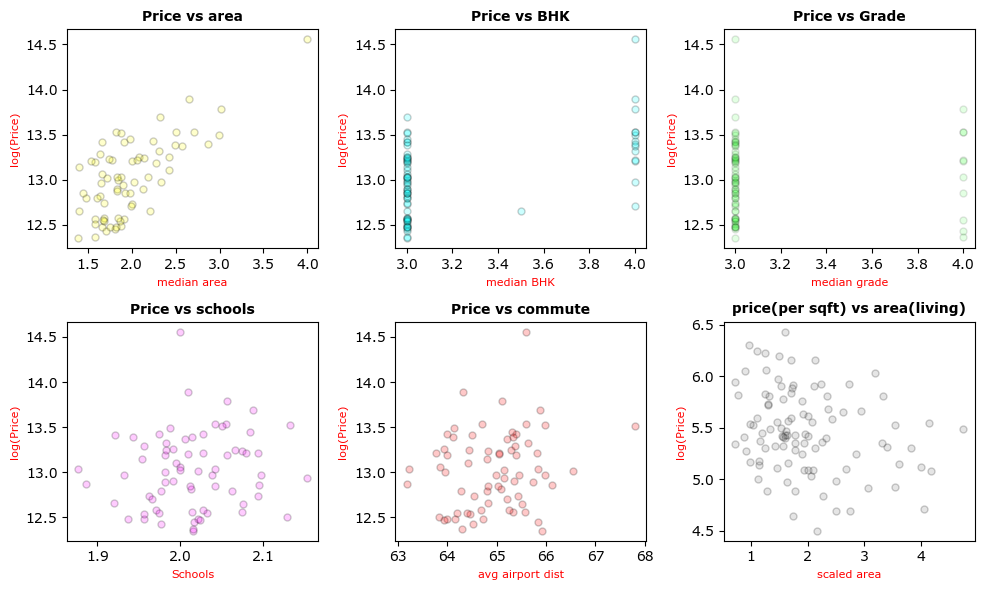

In [189]:
fig,axes = plt.subplots(2,3,figsize=(10, 6))
data1 = data.sample(100)

# fill_colors = ["yellow", "cyan", "lime", "magenta", "gold", "lightblue",]
    
    

axes[0,0].scatter(summary["Area_med"]/1000,np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "yellow")
axes[0,0].set_xlabel("median area",color = "red",fontsize=8)
axes[0,0].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,0].set_title("Price vs area",fontsize=10, fontweight='bold')

axes[0,1].scatter(summary["BHK_med"],np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "cyan")
axes[0,1].set_xlabel("median BHK",color = "red",fontsize=8)
axes[0,1].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,1].set_title("Price vs BHK",fontsize=10, fontweight='bold')

axes[0,2].scatter(summary["Grade_med"],np.log(summary["Price_med"]),alpha = 0.11,s= 25,edgecolors = "black",color = "lime")
axes[0,2].set_xlabel("median grade",color = "red",fontsize=8)
axes[0,2].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[0,2].set_title("Price vs Grade",fontsize=10, fontweight='bold')

axes[1,0].scatter(summary["Schools_avg"],np.log(summary["Price_med"]),alpha = 0.20,s= 25,edgecolors = "black",color = "magenta")
axes[1,0].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,0].set_xlabel("Schools",color = "red",fontsize=8)
axes[1,0].set_title("Price vs schools",fontsize=10, fontweight='bold')

axes[1,1].scatter(summary["AirportDist_avg"],np.log(summary["Price_med"]),alpha = 0.21,s= 25,edgecolors = "black",color = "red")
axes[1,1].set_xlabel("avg airport dist",color = "red",fontsize=8)
axes[1,1].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,1].set_title("Price vs commute",fontsize=10, fontweight='bold')

axes[1,2].scatter(data1["living area"]/1000,np.log(data1["p_sqft"]),alpha = 0.20,s= 25,edgecolors = "black",color = "gray")
axes[1,2].set_xlabel("scaled area",color = "red",fontsize=8)
axes[1,2].set_ylabel("log(Price)",color = "red",fontsize=8)
axes[1,2].set_title("price(per sqft) vs area(living)",fontsize=10, fontweight='bold')


fig.tight_layout()
fig.savefig("median_analysis_withallconstraints")
plt.show()

            
# fig,axes = plt.subplots(3,3)
# axes[0,0].scatter(summary["Area_med"]/1000,np.log(summary["Price_med"]),alpha = 0.11,s= 25,edgecolors = "black",color = "yellow")
# axes[0,0].set_xlabel("median area ")
# axes[0,0].set_ylabel("median price")
# axes[0,0].set_title("price vs area")
# plt.tight_layout()




In [118]:
# summary[(summary[""]&summary[""])]
# data.columns.tolist()
summary

,Postal Code,Price_med,Area_med,BHK_med,Grade_med,Schools_avg,AirportDist_avg
0,122003,750000.0,1820.0,3.0,3.0,2.131783,65.976744
1,122004,675000.0,1910.0,3.0,3.0,1.974522,64.000000
2,122005,609500.0,2310.0,4.0,3.0,1.983173,65.634615
3,122006,550000.0,1780.0,3.0,3.0,2.027708,65.042821
4,122007,535000.0,1580.0,3.0,3.0,1.982323,63.987374
...,...,...,...,...,...,...,...
65,122068,281508.5,1675.0,3.0,4.0,1.974026,64.201299
66,122069,453000.0,1830.0,3.0,4.0,2.000000,65.146067
67,122070,261000.0,1750.0,3.0,3.0,2.024096,63.927711
68,122071,2100000.0,3990.0,4.0,3.0,2.000000,65.594595


In [109]:
# sa = data.groupby(data["Postal Code"])["Distance from the airport"].median().reset_index()
# sa[sa["Distance from the airport"]>65]
# data[data["Postal Code"] == 122071][]
# 122005
# 122071

In [166]:
# tradeoff_1 = summary.loc[(summary["Postal Code"] == 12201)|(summary["Postal Code"] == 122005)]
# tradeoff_1
summary["Price_med"].sort_values()

# 122005,122068(no of beds and schools)
# 122071(condition,for school and)
# 122068(for airport_ school,area)
122025
53
# summary[summary["Schools_avg"]<2] #(122056 grade,area,sacrificed for school)
tradeoff = summary[summary["Postal Code"].isin([122005,122025,122071,122068,122053,122056])][:].reset_index()
tradeoff



,index,Postal Code,Price_med,Area_med,BHK_med,Grade_med,Schools_avg,AirportDist_avg
0,2,122005,609500.0,2310.0,4.0,3.0,1.983173,65.634615
1,22,122025,397000.0,1830.0,3.0,3.0,1.981818,65.739394
2,50,122053,380000.0,1980.0,3.0,4.0,2.041509,64.822642
3,53,122056,230750.0,1395.0,3.0,3.0,2.015957,65.925532
4,65,122068,281508.5,1675.0,3.0,4.0,1.974026,64.201299
5,68,122071,2100000.0,3990.0,4.0,3.0,2.000000,65.594595
